<a href="https://colab.research.google.com/github/Vanessa5331/stats-calculation/blob/main/curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, random

## Estimating g from the pendulum

Perform curve fitting to find the g value and its uncertainty, using the fact that the relationship
between the period T and the length L is: $$T = 2\pi\sqrt{\frac{L}{g}}$$

In [2]:
lengths = np.array([
  6, 6, 20, 21, 24, 25, 25, 25, 25.5, 25.5,
  25.8, 25.9, 25.9, 25.9, 26, 28, 29, 29, 30, 30,
  30, 30, 30, 30, 30, 35, 40, 40, 40, 40,
  40, 41, 51, 61, 71, 81, 91, 101, 110, 400,
  400, 400, 400
]) # cm
periods = np.array([
  0.35, 0.492, 0.887, 0.952, 1.018, 0.903, 1.047, 1.05, 0.984, 0.966,
  0.975, 0.991, 1, 0.958, 1.016, 1.047, 1.091, 1.166, 1.066, 1.05,
  1.069, 0.959, 1.091, 1.113, 1.034, 1.131, 1.157, 1.272, 1.185, 1.263,
  1.27, 1.272, 1.319, 1.488, 1.628, 1.819, 1.875, 1.988, 2.075, 4.033,
  4.009, 3.994, 3.988
]) # seconds
sd_periods = np.array([
  0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
  0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
  0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
  0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
  0.02, 0.02, 0.02
]) # uncertainty in period (seconds)

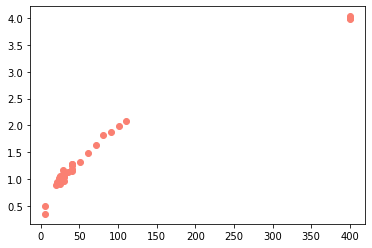

In [3]:
plt.scatter(lengths, periods, color='salmon')

In [4]:
def f(L, g):
    return 2*math.pi*np.sqrt((L/100)/g)

We use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to find parameters of the function to fit to data, along with the parameter's uncertainty.

In [5]:
import scipy.optimize
popt, pcov = scipy.optimize.curve_fit(f, lengths, periods, sigma=sd_periods)

In [6]:
# popt contains the estimated parameters g  in the function f(L, g) above
popt

array([10.05389487])

In [7]:
# to get standard deviation of g
np.sqrt(pcov)

array([[0.0958045]])

From the popt and pcov above, the estimate parameter g are:

    g = 10.054 ± 0.096 kg

We can plot the fitted function and our data with [error bars](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) (uncertainty for each data point) like this:


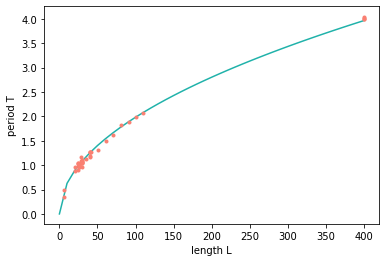

In [8]:
x = np.arange(0,410,10)
plt.plot(x, f(x, *popt), color='lightseagreen')
plt.errorbar(lengths, periods, yerr=sd_periods, fmt = '.', color='salmon')
plt.xlabel("length L")
plt.ylabel("period T")
plt.show()